In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url='https://drive.google.com/file/d/189daQiBIZN1D2TU8YXQIZH-a5f_s6I41/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
rides = pd.read_csv(path, encoding='utf-8')
rides.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-17,7:12,Migori,Nairobi,Bus,49
8,5778,21B,Mpesa,TE1WYK1NYE,27-11-17,7:12,Migori,Nairobi,Bus,49
9,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49


In [ ]:
## Delete the seat number, payment method and payment receipt

rides = rides.drop(columns=['seat_number', 'payment_method', 'payment_receipt'], axis=0)
rides.head(10)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49
5,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
7,5778,27-11-17,7:12,Migori,Nairobi,Bus,49
8,5778,27-11-17,7:12,Migori,Nairobi,Bus,49
9,5781,27-11-17,7:09,Homa Bay,Nairobi,Bus,49


In [ ]:
rides.shape

## We got 51645 rows

(51645, 7)

In [ ]:
len(rides['ride_id'].unique())

## 6429 rides

6249

In [ ]:
## aggregate the number of tickets sold for each ride

tickets_df = rides.groupby(by=['ride_id'])['ride_id'].count().to_frame()
tickets_df = tickets_df.rename(columns = {'ride_id':'count'})
rides = pd.merge(rides,tickets_df,on='ride_id')
rides.head(10)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
5,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
6,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
7,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
8,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31
9,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
rides = rides.drop_duplicates()
rides.head(10)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
8,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31
39,5781,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
65,5784,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
66,5789,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
67,5790,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
69,5791,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [ ]:
rides = rides.reset_index().drop(columns=['index'], axis=0)

In [ ]:
rides.head(10)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [ ]:
## create new feature weekday

import datetime

rides['weekday'] = 0
for i in range(6249):
  date = rides['travel_date'][i]
  day, month, year = (int(x) for x in date.split('-'))
  rides['weekday'][i] = datetime.date(year, month, day).weekday()  ## 0 is Monday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
## split the departure time into 1-hour interval and create a new feature called departure hour

rides['departure_hour'] = 0
for i in range(6249):
  time = rides['travel_time'][i]
  hour, min = (int(x) for x in time.split(':'))
  rides['departure_hour'][i] = hour 

rides.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,count,weekday,departure_hour
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,1,7
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,6,7
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,6,7
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,0,7
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31,0,7
5,5781,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26,0,7
6,5784,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1,4,5
7,5789,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1,4,9
8,5790,20-04-18,7:06,Kisii,Nairobi,Bus,49,2,4,7
9,5791,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1,4,6


In [ ]:
## uber movements

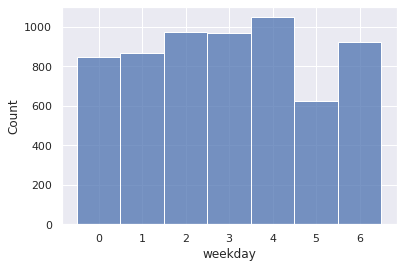

In [ ]:
## Visualization: weekday distribution

import seaborn as sns

sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=rides, x='weekday', discrete=True) 
## roughly the same except Saturday

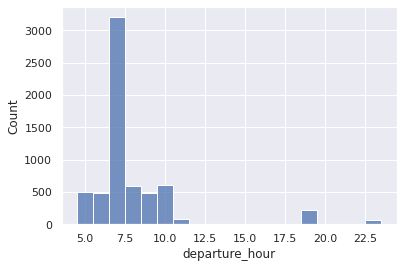

In [ ]:
## departure hour distribution

sns.histplot(data=rides, x='departure_hour', discrete=True) 
## Most of the rides depart at 7

averge tickets sold: 8.264522323571772


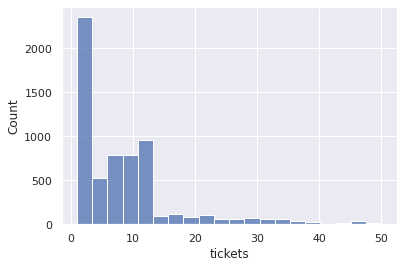

In [ ]:
## tickets distribution

sns.histplot(data=rides, x='count', bins = 20).set_xlabel("tickets") 
print('averge tickets sold:', rides['count'].mean())
## Not many rides sell more than 10 tickets

Text(0.5, 0, 'tickets')

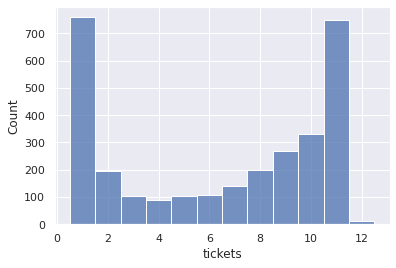

In [ ]:
## tickets distribution only for shuttles

sns.histplot(data=rides[rides['car_type']=='shuttle'], x='count', bins = 20, discrete=True).set_xlabel("tickets") 

Text(0.5, 0, 'tickets')

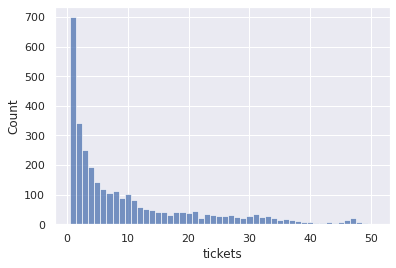

In [ ]:
## tickets distribution only for buses

sns.histplot(data=rides[rides['car_type']=='Bus'], x='count', bins = 20, discrete=True).set_xlabel("tickets") 
## The bus is usually almost empty while for the shuttles, they are almost always full or empty.

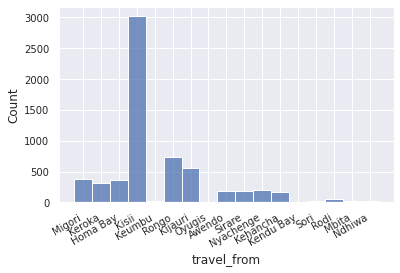

In [ ]:
## origin distribution
import matplotlib.pyplot as plt

sns.histplot(data=rides, x='travel_from').get_figure().autofmt_xdate()
plt.tick_params(labelsize=10)
## Most of the rides start from Kisii

Text(0, 0.5, 'avg_tickets')

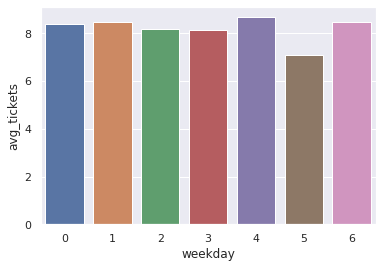

In [ ]:
## Average tickets sold on each weekday

avg_tickets = rides.groupby(by=['weekday'])['count'].mean().to_frame()
avg_tickets.reset_index(inplace=True)
sns.barplot(data=avg_tickets, x='weekday', y='count').set_ylabel("avg_tickets") 

Text(0, 0.5, 'avg_tickets')

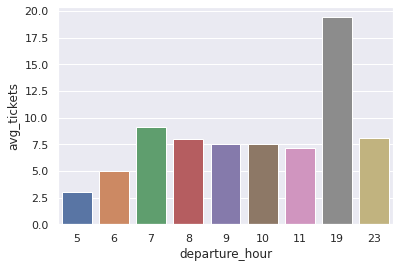

In [ ]:
## Average tickets sold in each departure hour

avg_tickets = rides.groupby(by=['departure_hour'])['count'].mean().to_frame()
avg_tickets.reset_index(inplace=True)
sns.barplot(data=avg_tickets, x='departure_hour', y='count').set_ylabel("avg_tickets") 
## 7pm departure is a surprise!!!

Text(0, 0.5, 'avg_tickets')

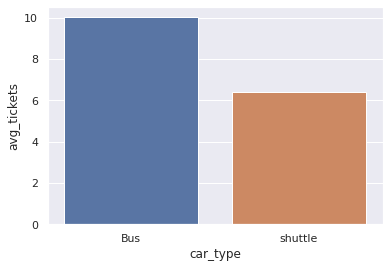

In [ ]:
## Average tickets sold for each car_type

avg_tickets = rides.groupby(by=['car_type'])['count'].mean().to_frame()
avg_tickets.reset_index(inplace=True)
sns.barplot(data=avg_tickets, x='car_type', y='count').set_ylabel("avg_tickets") 

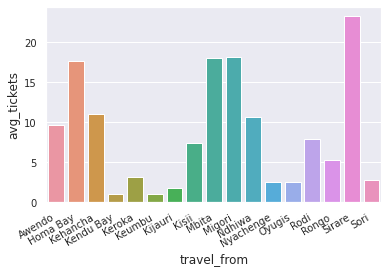

In [ ]:
## Average tickets sold for each origin

avg_tickets = rides.groupby(by=['travel_from'])['count'].mean().to_frame()
avg_tickets.reset_index(inplace=True)
sns.barplot(data=avg_tickets, x='travel_from', y='count').set_ylabel("avg_tickets").get_figure().autofmt_xdate()
plt.tick_params(labelsize=10)

In [ ]:
Kisii = rides[rides['travel_from'] == 'Kisii']
print(Kisii['car_type'].value_counts())
print(Kisii['max_capacity'].value_counts())
## Kisii has lots of rides but most of them are shuttles

shuttle    2499
Bus         521
Name: car_type, dtype: int64
11    2499
49     521
Name: max_capacity, dtype: int64


In [ ]:
## The date interval is totally different in training/test. Probably don't need any date feature
## travel_time: 60*hour + minutes
## log the tickets and the travel time
## what features do we need from uber movement?
## random forest, GBR
## OHE origin